I will explore four questions today:
1. What is the distribution of salaries in USD across different experience levels?
2. How does the salary vary based on the job title?
3. Is there a relationship between the company size and the salary offered?
4. How does the remote work ratio affect the salaries?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
data = np.genfromtxt('data/ds_salaries.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
print(data.dtype.names)
print(data.shape)

('id', 'work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size')
(607,)


In [26]:
print(len(set(data['job_title'])))
print(len(set(data['salary_currency'])))
print(len(set(data['employee_residence'])))
print(len(set(data['company_location'])))

50
17
57
50


In [23]:
salaries = data["salary_in_usd"]
print(np.min(salaries))
print(np.max(salaries))

2859
600000


Median salary for SE is 135500.0
Median salary for MI is 76940.0
Median salary for EX is 167875.0
Median salary for EN is 56500.0


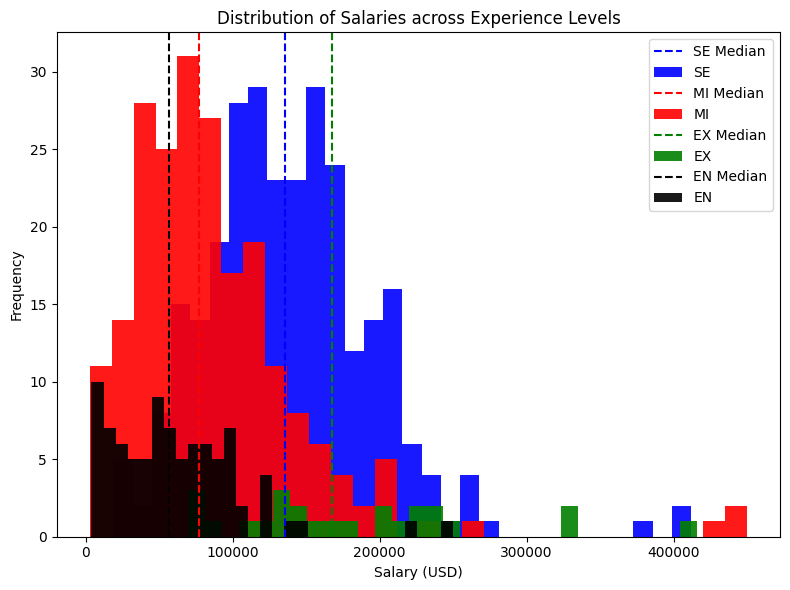

In [30]:
# 1. Distribution of salaries across experience levels
plt.figure(figsize=(8, 6))
experience_levels = np.unique(data['experience_level'])
colors = {"EN": "black", "EX": "green", "MI": "red", "SE": "blue"}
for i in range(len(experience_levels)-1, -1, -1):
    level = experience_levels[i]
    salaries = data['salary_in_usd'][data['experience_level'] == level]
    salaries = salaries[salaries < 500000]
    print("Median salary for", level, "is", np.median(salaries))
    plt.axvline(np.median(salaries), color=colors.get(level), linestyle='--', label=level + " Median")
    plt.hist(salaries, bins=30, alpha=0.9, label=level, color=colors.get(level))
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries across Experience Levels')
plt.legend()
plt.tight_layout()
plt.show()

From the distribution of salaries across different experience levels, we can see that the salaries increase with experience. The distribution of salaries is right-skewed, with a few outliers having high salaries. The median salary for the Entry level is 56,000 USD, for the Mid level is 76,000 USD, for the Senior level is 135,000 USD and for the executive level is 171,000 USD.

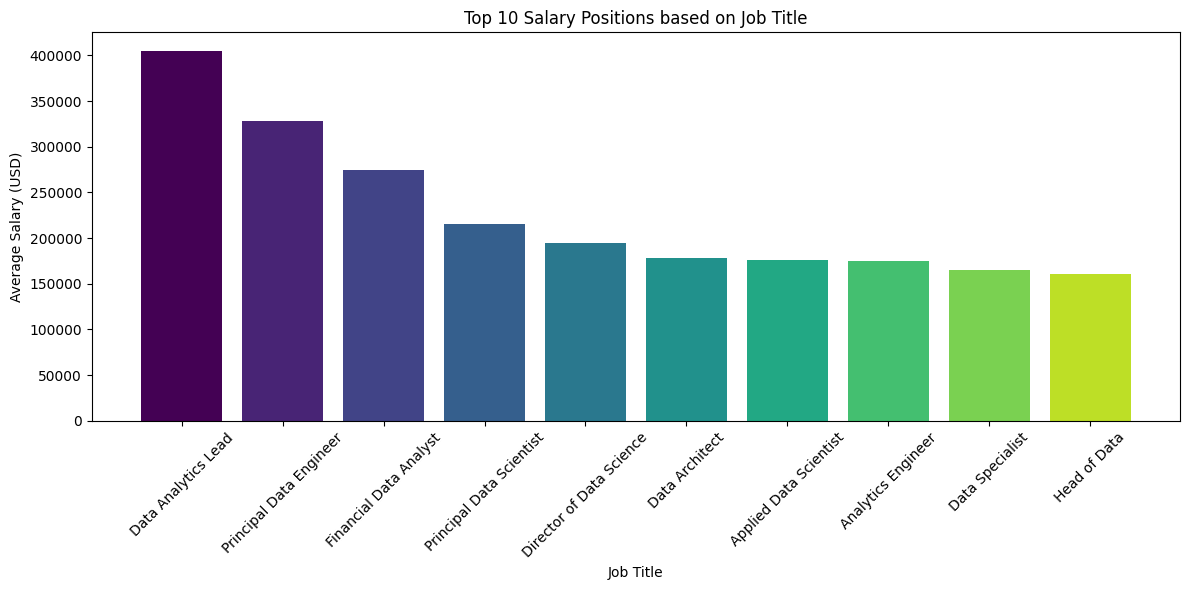

In [39]:
plt.figure(figsize=(12, 6))
job_titles = np.unique(data['job_title'])
salary_by_job = [data['salary_in_usd'][data['job_title'] == title].mean() for title in job_titles]

# Zip job titles and salaries together
job_salary_zip = zip(job_titles, salary_by_job)

# Sort by salary in descending order
sorted_job_salary = sorted(job_salary_zip, key=lambda x: x[1], reverse=True)

sorted_job_salary = sorted_job_salary[:10]

# Unzip the sorted data
sorted_job_titles, sorted_salaries = zip(*sorted_job_salary)

num_bars = len(sorted_job_titles)
cmap = plt.get_cmap('viridis')
colors = [cmap(i / num_bars) for i in range(num_bars)]

plt.bar(sorted_job_titles, sorted_salaries, color=colors)
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.title('Top 10 Salary Positions based on Job Title')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the job title analysis, we can see that the salaries are highest for the executive roles, followed by the senior roles, mid-level roles, and entry-level roles. The median salary for the executive roles is 171,000 USD, for the senior roles is 135,000 USD, for the mid-level roles is 76,000 USD, and for the entry-level roles is 56,000 USD.